In [1]:
import pandas as pd

In [2]:
insta_date = pd.read_csv('date_data.csv')
insta_date.head()

,DATE
0,2019년 12월 4
1,4월 28
2,5월 7
3,4월 25
4,2일


In [3]:
insta_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1100 non-null   object
dtypes: object(1)
memory usage: 8.7+ KB


In [4]:
split = insta_date.DATE.str.split('월')
split

0       [2019년 12,  4]
1             [4,  28]
2              [5,  7]
3             [4,  25]
4                [2일 ]
             ...      
1095           [2,  1]
1096           [2,  1]
1097           [2,  1]
1098           [2,  1]
1099           [2,  1]
Name: DATE, Length: 1100, dtype: object

In [5]:
split = split.apply(lambda x : pd.Series(x))
split

,0,1
0,2019년 12,4
1,4,28
2,5,7
3,4,25
4,2일,NaN
...,...,...
1095,2,1
1096,2,1
1097,2,1
1098,2,1


In [6]:
split.rename(columns= {0 : "month", 1 : "date"}, inplace = True)
split

,month,date
0,2019년 12,4
1,4,28
2,5,7
3,4,25
4,2일,NaN
...,...,...
1095,2,1
1096,2,1
1097,2,1
1098,2,1


In [7]:
insta = split.dropna()
insta

,month,date
0,2019년 12,4
1,4,28
2,5,7
3,4,25
5,3,17
...,...,...
1095,2,1
1096,2,1
1097,2,1
1098,2,1


In [8]:
insta.head(30)

,month,date
0,2019년 12,4
1,4,28
2,5,7
3,4,25
5,3,17
6,6,5
7,5,30
8,5,31
79,5,12
106,6,15


In [9]:
insta_1 = insta.loc[insta['month'].str.contains('2019년', na = True)]
insta_1.head()

,month,date
0,2019년 12,4
631,2019년 8,26
632,2019년 8,19
633,2019년 1,1
671,2019년 1,1


In [10]:
insta_1 = insta.loc[insta['month'].str.contains('2018년', na = True)]
insta_1.head()

,month,date
634,2018년 10,27
635,2018년 10,27
636,2018년 10,27


In [11]:
insta_2 = insta.drop([insta.index[0],insta.index[631],insta.index[632],insta.index[633],insta.index[671],insta.index[634],insta.index[635],insta.index[636]])

insta_2.head(80)

,month,date
1,4,28
2,5,7
3,4,25
5,3,17
6,6,5
...,...,...
173,6,7
174,6,7
175,6,7
176,6,7


In [12]:
insta_2 = insta.loc[insta['date'].str.contains('2019년', na = True)]
insta_2.head()

,month,date


In [13]:
insta_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   0 non-null      object
 1   date    0 non-null      object
dtypes: object(2)
memory usage: 0.0+ bytes


In [14]:
insta_2.astype({'month':'float','date':'float'}).dtypes

month    float64
date     float64
dtype: object

In [15]:
June = insta.loc[insta['month'].str.contains('6', na = True)]
June.count()

month    158
date     158
dtype: int64

In [16]:
May = insta.loc[insta['month'].str.contains('5', na = True)]
May.count()

month    340
date     340
dtype: int64

In [17]:
April = insta.loc[insta['month'].str.contains('4', na = True)]
April.count()

month    234
date     234
dtype: int64

In [18]:
March = insta.loc[insta['month'].str.contains('3', na = True)]
March.count()

month    136
date     136
dtype: int64

In [19]:
February = insta.loc[insta['month'].str.contains('2', na = True)]
February.count()

month    134
date     134
dtype: int64

In [20]:
import matplotlib.pyplot as plt
import numpy as np

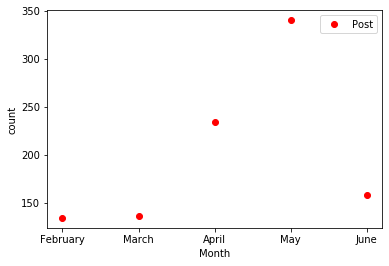

In [21]:
x=['February','March','April','May','June']
y=[len(February),len(March),len(April),len(May),len(June)]

l = plt.plot(x,y,'ro',label='Post')
plt.xlabel('Month')
plt.ylabel('count')
plt.legend(loc='best')
plt.show()

In [22]:
month_sum = len(February)+len(March)+len(April)+len(May)+len(June)
month_mean = month_sum//5
month_mean

200

In [23]:
import seaborn as sns

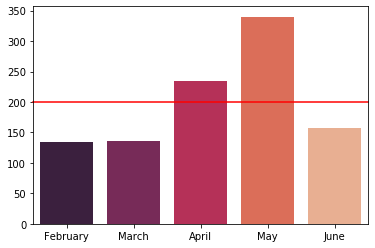

In [24]:
sns.barplot(x=x, y=y, palette="rocket").axhline(month_mean, color="r", clip_on=False)

In [25]:
May.head(10)

,month,date
2,5,7
7,5,30
8,5,31
79,5,12
263,5,31
264,5,31
265,5,31
266,5,31
267,5,31
268,5,31


In [26]:
May_1 = May.loc[insta['date'].str.contains('1', na = True)]
May_2 = May.loc[insta['date'].str.contains('2', na = True)]
May_3 = May.loc[insta['date'].str.contains('3', na = True)]
May_4 = May.loc[insta['date'].str.contains('4', na = True)]
May_5 = May.loc[insta['date'].str.contains('5', na = True)]
May_6 = May.loc[insta['date'].str.contains('6', na = True)]
May_7 = May.loc[insta['date'].str.contains('7', na = True)]
May_8 = May.loc[insta['date'].str.contains('8', na = True)]
May_9 = May.loc[insta['date'].str.contains('9', na = True)]
May_10 = May.loc[insta['date'].str.contains('10', na = True)]
May_11 = May.loc[insta['date'].str.contains('11', na = True)]
May_12 = May.loc[insta['date'].str.contains('12', na = True)]
May_13 = May.loc[insta['date'].str.contains('13', na = True)]
May_14 = May.loc[insta['date'].str.contains('14', na = True)]
May_15 = May.loc[insta['date'].str.contains('15', na = True)]
May_16 = May.loc[insta['date'].str.contains('16', na = True)]
May_17 = May.loc[insta['date'].str.contains('17', na = True)]
May_18 = May.loc[insta['date'].str.contains('18', na = True)]
May_19 = May.loc[insta['date'].str.contains('19', na = True)]
May_20 = May.loc[insta['date'].str.contains('20', na = True)]
May_21 = May.loc[insta['date'].str.contains('21', na = True)]
May_22 = May.loc[insta['date'].str.contains('22', na = True)]
May_23 = May.loc[insta['date'].str.contains('23', na = True)]
May_24 = May.loc[insta['date'].str.contains('24', na = True)]
May_25 = May.loc[insta['date'].str.contains('25', na = True)]
May_26 = May.loc[insta['date'].str.contains('26', na = True)]
May_27 = May.loc[insta['date'].str.contains('27', na = True)]
May_28 = May.loc[insta['date'].str.contains('28', na = True)]
May_29 = May.loc[insta['date'].str.contains('29', na = True)]
May_30 = May.loc[insta['date'].str.contains('30', na = True)]
May_31 = May.loc[insta['date'].str.contains('31', na = True)]

In [27]:
from pandas import DataFrame as df

In [28]:
May = df(data = {'Date' :[len(May_1),len(May_2),len(May_3),len(May_4),len(May_5),len(May_6),len(May_7),len(May_8),len(May_9),len(May_10),
  len(May_11),len(May_12),len(May_13),len(May_14),len(May_15),len(May_16),len(May_17),len(May_18),len(May_19),len(May_20),
  len(May_21),len(May_22),len(May_23),len(May_24),len(May_25),len(May_26),len(May_27),len(May_28),len(May_29),len(May_30),len(May_31)] })
May

,Date
0,132
1,139
2,69
3,38
4,39
5,25
6,44
7,18
8,14
9,12


In [29]:
April_1 = April.loc[insta['date'].str.contains('1', na = True)]
April_2 = April.loc[insta['date'].str.contains('2', na = True)]
April_3 = April.loc[insta['date'].str.contains('3', na = True)]
April_4 = April.loc[insta['date'].str.contains('4', na = True)]
April_5 = April.loc[insta['date'].str.contains('5', na = True)]
April_6 = April.loc[insta['date'].str.contains('6', na = True)]
April_7 = April.loc[insta['date'].str.contains('7', na = True)]
April_8 = April.loc[insta['date'].str.contains('8', na = True)]
April_9 = April.loc[insta['date'].str.contains('9', na = True)]
April_10 = April.loc[insta['date'].str.contains('10', na = True)]
April_11 = April.loc[insta['date'].str.contains('11', na = True)]
April_12 = April.loc[insta['date'].str.contains('12', na = True)]
April_13 = April.loc[insta['date'].str.contains('13', na = True)]
April_14 = April.loc[insta['date'].str.contains('14', na = True)]
April_15 = April.loc[insta['date'].str.contains('15', na = True)]
April_16 = April.loc[insta['date'].str.contains('16', na = True)]
April_17 = April.loc[insta['date'].str.contains('17', na = True)]
April_18 = April.loc[insta['date'].str.contains('18', na = True)]
April_19 = April.loc[insta['date'].str.contains('19', na = True)]
April_20 = April.loc[insta['date'].str.contains('20', na = True)]
April_21 = April.loc[insta['date'].str.contains('21', na = True)]
April_22 = April.loc[insta['date'].str.contains('22', na = True)]
April_23 = April.loc[insta['date'].str.contains('23', na = True)]
April_24 = April.loc[insta['date'].str.contains('24', na = True)]
April_25 = April.loc[insta['date'].str.contains('25', na = True)]
April_26 = April.loc[insta['date'].str.contains('26', na = True)]
April_27 = April.loc[insta['date'].str.contains('27', na = True)]
April_28 = April.loc[insta['date'].str.contains('28', na = True)]
April_29 = April.loc[insta['date'].str.contains('29', na = True)]
April_30 = April.loc[insta['date'].str.contains('30', na = True)]

In [30]:
April= df(data = {'Date' :[len(April_1),len(April_2),len(April_3),len(April_4),len(April_5),len(April_6),len(April_7),len(April_8),len(April_9),len(April_10),
  len(April_11),len(April_12),len(April_13),len(April_14),len(April_15),len(April_16),len(April_17),len(April_18),len(April_19),len(April_20),
  len(April_21),len(April_22),len(April_23),len(April_24),len(April_25),len(April_26),len(April_27),len(April_28),len(April_29),len(April_30)] })
April

,Date
0,94
1,93
2,30
3,24
4,31
5,32
6,24
7,25
8,25
9,7


In [36]:
insta = pd.merge(April, May, left_index = True, right_index = True, how = 'left').fillna(0)
insta

insta.rename(columns={'Date_x':'April', 'Date_y':'May'}, inplace = True)
insta

,April,May
0,94,132
1,93,139
2,30,69
3,24,38
4,31,39
5,32,25
6,24,44
7,25,18
8,25,14
9,7,12


<function matplotlib.pyplot.show(*args, **kw)>

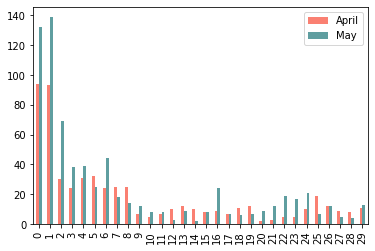

In [41]:
insta.plot(kind='bar', color = ['salmon', 'cadetblue'])
plt.show